Collection/summary/comparison of stereoseq data from Human

In [19]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import anndata as ad

# modify path so we can import a custom module
import sys
sys.path.append('.')

from sawg import SpotTable

In [2]:
data_path = '//allen/programs/celltypes/workgroups/rnaseqanalysis/NHP_spatial'

## Human

In [3]:
human_NT_file = data_path + '/BGI/human/903TR_C4/SS200000903TR_C4.tissue.gem'
human_AD_file = data_path + '/BGI/human/903TR_D6/SS200000903TR_D6.tissue.gem'

In [4]:
human_NT_table = SpotTable.load_stereoseq(human_NT_file, human_NT_file + '.npz')
human_AD_table = SpotTable.load_stereoseq(human_AD_file, human_AD_file + '.npz', skiprows=7)

Loading from npz..
Loading from npz..


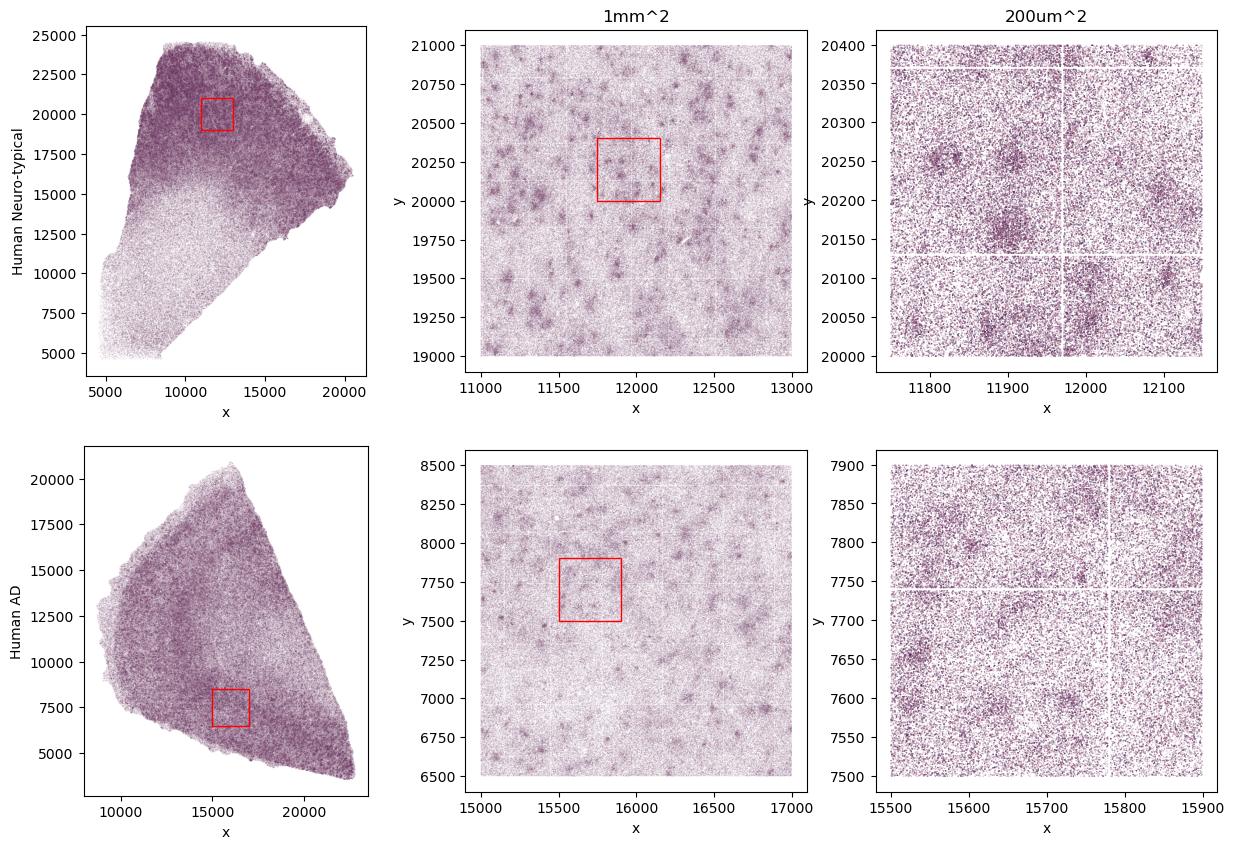

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sub_regions = {
    'sub': (((11000, 13000), (19000, 21000)), ((15000, 17000), (6500, 8500))),
    'sub2': (((11750, 12150), (20000, 20400)), ((15500, 15900), (7500, 7900)))
}

for i, table in enumerate([human_NT_table, human_AD_table]):
    table[::100].scatter_plot(ax=ax[i, 0], alpha=0.1, size=0.5)
    xlims = sub_regions['sub'][i][0]
    ylims = sub_regions['sub'][i][1]
    sub = table.get_subregion(xlim=xlims, ylim=ylims)
    sub.plot_rect(ax[i, 0], 'r')
    sub[::5].scatter_plot(ax=ax[i, 1], alpha=0.1, size=0.5)
    xlims2 = sub_regions['sub2'][i][0]
    ylims2 = sub_regions['sub2'][i][1]
    sub2 = sub.get_subregion(xlim=xlims2, ylim=ylims2)
    sub2.plot_rect(ax[i, 1], 'r')
    sub2.scatter_plot(ax=ax[i, 2], alpha=0.3, size=1)
    
    if i==0:
        ax[i, 1].set_title('1mm^2')
        ax[i, 2].set_title('200um^2')
        ax[i, 0].set_ylabel('Human Neuro-typical')
    if i==1:
#         [axi.invert_xaxis() for axi in ax[i]]
#         [axi.invert_yaxis() for axi in ax[i]]
        ax[i, 0].set_ylabel('Human AD')

In [11]:
ex_genes = ['CUX2', 'RORB', 'IL1RAPL2', 'NTNG2', 'FOXP2']
in_genes = ['VIP', 'PVALB', 'GRIK1', 'LAMP5']
nn_genes = ['GFAP', 'OPALIN', 'PDGFRA', 'MOG']

Text(0, 0.5, 'Human AD')

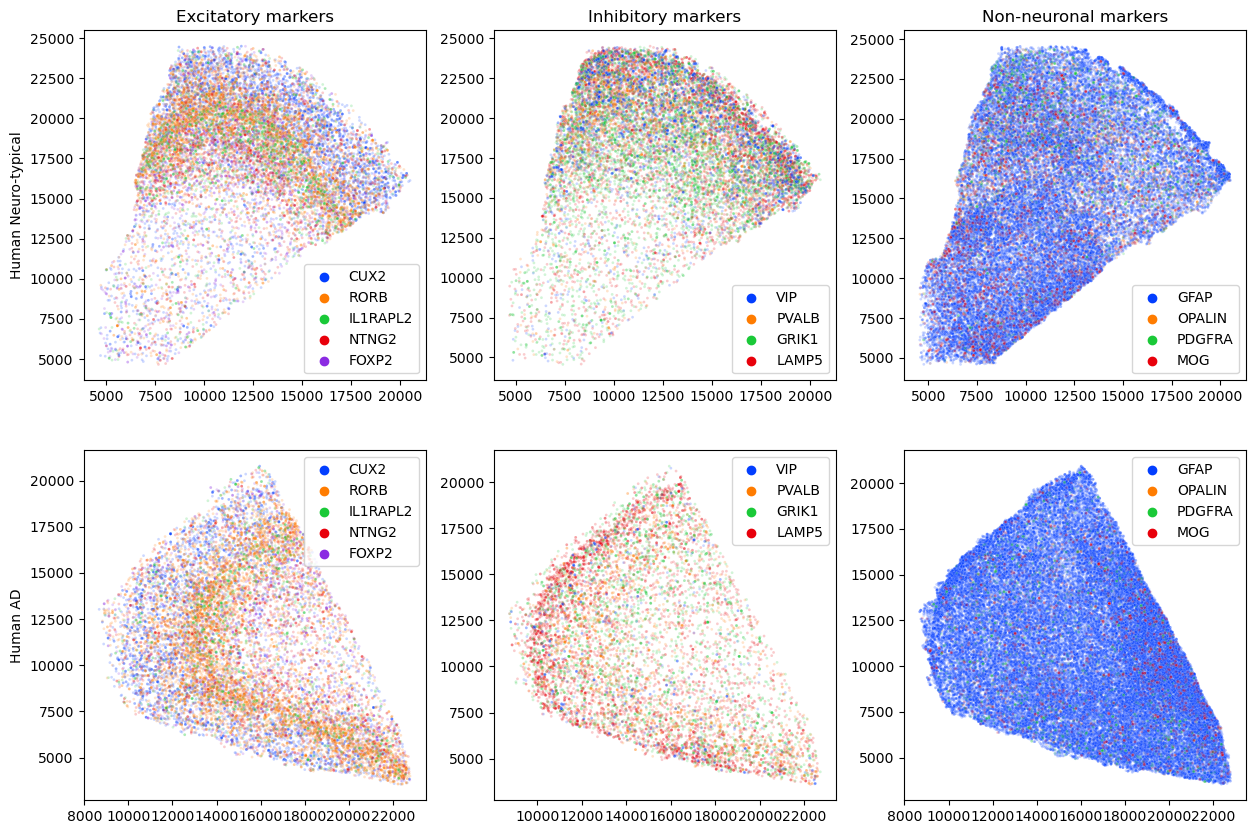

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, table in enumerate([human_NT_table, human_AD_table]):
    for j, gene_list in enumerate([ex_genes, in_genes, nn_genes]):
        gene_table = table.get_genes(gene_list)
        sns.scatterplot(x=gene_table.x, y=gene_table.y, hue=gene_table.gene_names, palette='bright', hue_order=gene_list, 
                        alpha=0.2, s=4, ax=ax[i, j])
        
ax[0, 0].set_title('Excitatory markers')
ax[0, 1].set_title('Inhibitory markers')
ax[0, 2].set_title('Non-neuronal markers')
ax[0, 0].set_ylabel('Human Neuro-typical')
ax[1, 0].set_ylabel('Human AD')

Text(0, 0.5, 'Human AD')

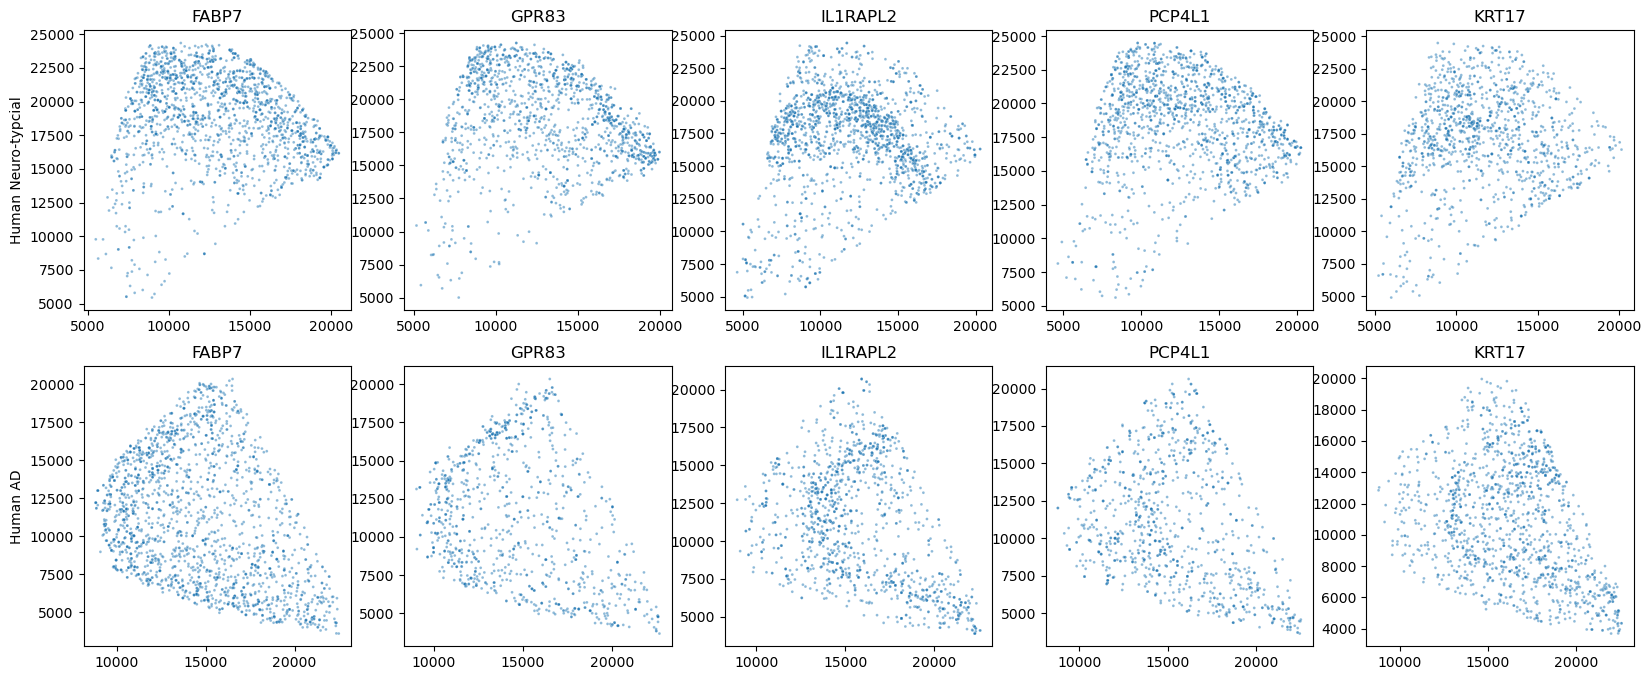

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

plot_genes = ['FABP7', 'GPR83', 'IL1RAPL2', 'PCP4L1', 'KRT17']

for i, table in enumerate([human_NT_table, human_AD_table]):
    for j, gene in enumerate(plot_genes):
        gene_table = table.get_genes([gene])
        sns.scatterplot(x=gene_table.x, y=gene_table.y, hue=gene_table.gene_names, alpha=0.5, s=4, ax=ax[i, j], legend=False)
        ax[i, j].set_title(gene)
ax[0, 0].set_ylabel('Human Neuro-typcial')
ax[1, 0].set_ylabel('Human AD')

How does gene expression compare

In [9]:
human_NT_genes, human_NT_counts = np.unique(human_NT_table.gene_names, return_counts=True)
human_AD_genes, human_AD_counts = np.unique(human_AD_table.gene_names, return_counts=True)

print(f'Human Neuro-typical total genes: {len(human_NT_genes)}')
print(f'Human AD total genes: {len(human_AD_genes)}')

Human Neuro-typical total genes: 29958
Human AD total genes: 30084


In [110]:
gene_counts = pd.DataFrame(data=human_NT_counts, index=human_NT_genes, columns=['Human NT'])
gene_counts = gene_counts.merge(pd.DataFrame(data=human_AD_counts, index=human_AD_genes, columns=['Human AD']), left_index=True, 
                               right_index=True, how='outer')
gene_counts.head()

Human NT  Human AD
A1BG        1628.0    1086.0
A1BG-AS1     624.0     578.0
A1CF          39.0      14.0
A2M         4497.0    4198.0
A2M-AS1       88.0     103.0

In [58]:
# Correlation of genes that overlap
gene_counts.corr()

Human NT  Human AD
Human NT  1.000000  0.945563
Human AD  0.945563  1.000000

In [11]:
gene_counts = gene_counts.fillna(0)
# Correlation of all genes
gene_counts.corr()

Human NT  Human AD
Human NT  1.000000  0.945646
Human AD  0.945646  1.000000

In [60]:
# for comparison, 2 adjacent MERSCOPE sections from Macaque MTG have a correlation = 0.987

In [61]:
gene_counts[gene_counts.index.isin(ex_genes+in_genes+nn_genes)].sort_values('Human NT')

Human NT  Human AD
PDGFRA      1551.0    1157.0
IL1RAPL2    1949.0    1340.0
NTNG2       1961.0    1694.0
PVALB       2146.0    1798.0
FOXP2       2673.0    2378.0
MOG         2890.0    1512.0
VIP         3181.0     557.0
OPALIN      4447.0    1639.0
CUX2        5206.0    4015.0
RORB        6213.0    8101.0
GRIK1       6396.0    2578.0
LAMP5       7180.0    5081.0
GFAP       39194.0   70487.0

Text(0.5, 1.0, 'Total Gene Counts')

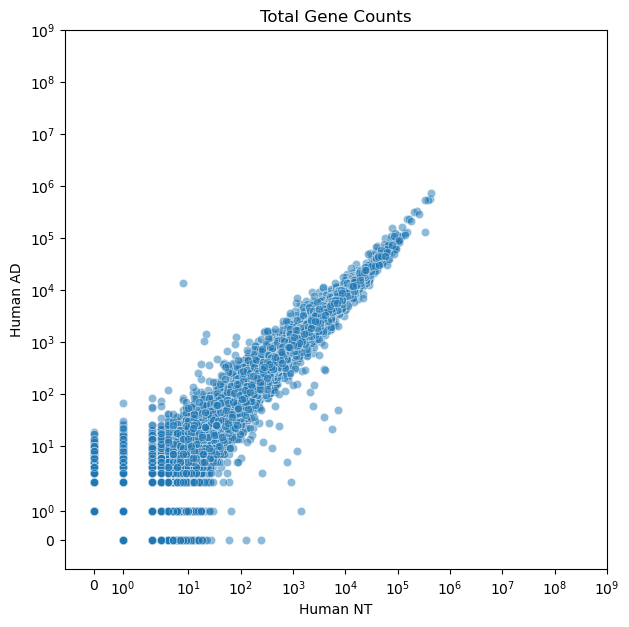

In [13]:
fig, ax = plt.subplots(figsize=(7,7))

sns.scatterplot(data=gene_counts, x='Human NT', y='Human AD', alpha=0.5, lw=0, ax=ax)
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_xlim(-1, 10e8)
ax.set_ylim(-1, 10e8)
ax.set_title('Total Gene Counts')

In [14]:
human_nt_only_genes = gene_counts[(gene_counts['Human NT']>0) & (gene_counts['Human AD']==0)].sort_values('Human NT', ascending=False).index.to_list()
print(f'Number of genes only captured in Human Neurotypical: {len(human_nt_only_genes)}')
human_ad_only_genes = gene_counts[(gene_counts['Human AD']>0) & (gene_counts['Human NT']==0)].sort_values('Human AD', ascending=False).index.to_list()
print(f'Number of genes only captured in Human AD: {len(human_ad_only_genes)}')

top_10 = gene_counts[gene_counts.index.isin(human_nt_only_genes[:10]+human_ad_only_genes[:10])].sort_values(['Human NT', 'Human AD'])
top_10

Number of genes only captured in Human Neurotypical: 908
Number of genes only captured in Human AD: 1034


Human NT  Human AD
CLEC12B          0.0      10.0
AC021180.1       0.0      12.0
FOXC2-AS1        0.0      12.0
MYF6             0.0      12.0
AC073321.1       0.0      13.0
CLYBL-AS1        0.0      13.0
NLRP2B           0.0      14.0
AC113607.1       0.0      17.0
AL583810.2       0.0      17.0
AC010424.2       0.0      19.0
AC145207.7      17.0       0.0
AC244517.9      17.0       0.0
LINC01888       18.0       0.0
TRAV8-5         18.0       0.0
AL592182.2      21.0       0.0
NLGN4Y-AS1      23.0       0.0
AC022001.2      27.0       0.0
AP000350.6      60.0       0.0
AC006157.1     125.0       0.0
AC010889.1     240.0       0.0

Look at differentially expressed genes between the 2 samples as well as some that are similar

In [15]:
human_nt_high = gene_counts[(gene_counts['Human NT']>=1e3) & (gene_counts['Human AD'].between(10, 100))].sort_values('Human NT', ascending=False)
human_nt_high

Human NT  Human AD
RPS4Y1    7222.0      50.0
NLGN4Y    5628.0      21.0
USP9Y     3891.0      37.0
UTY       2425.0      58.0

In [16]:
human_ad_high = gene_counts[(gene_counts['Human AD']>=1e3) & (gene_counts['Human NT'].between(10, 100))].sort_values('Human AD', ascending=False)
human_ad_high

Human NT  Human AD
IL1RL1      22.0    1441.0
DGCR6       81.0    1278.0
S100A9      20.0    1037.0

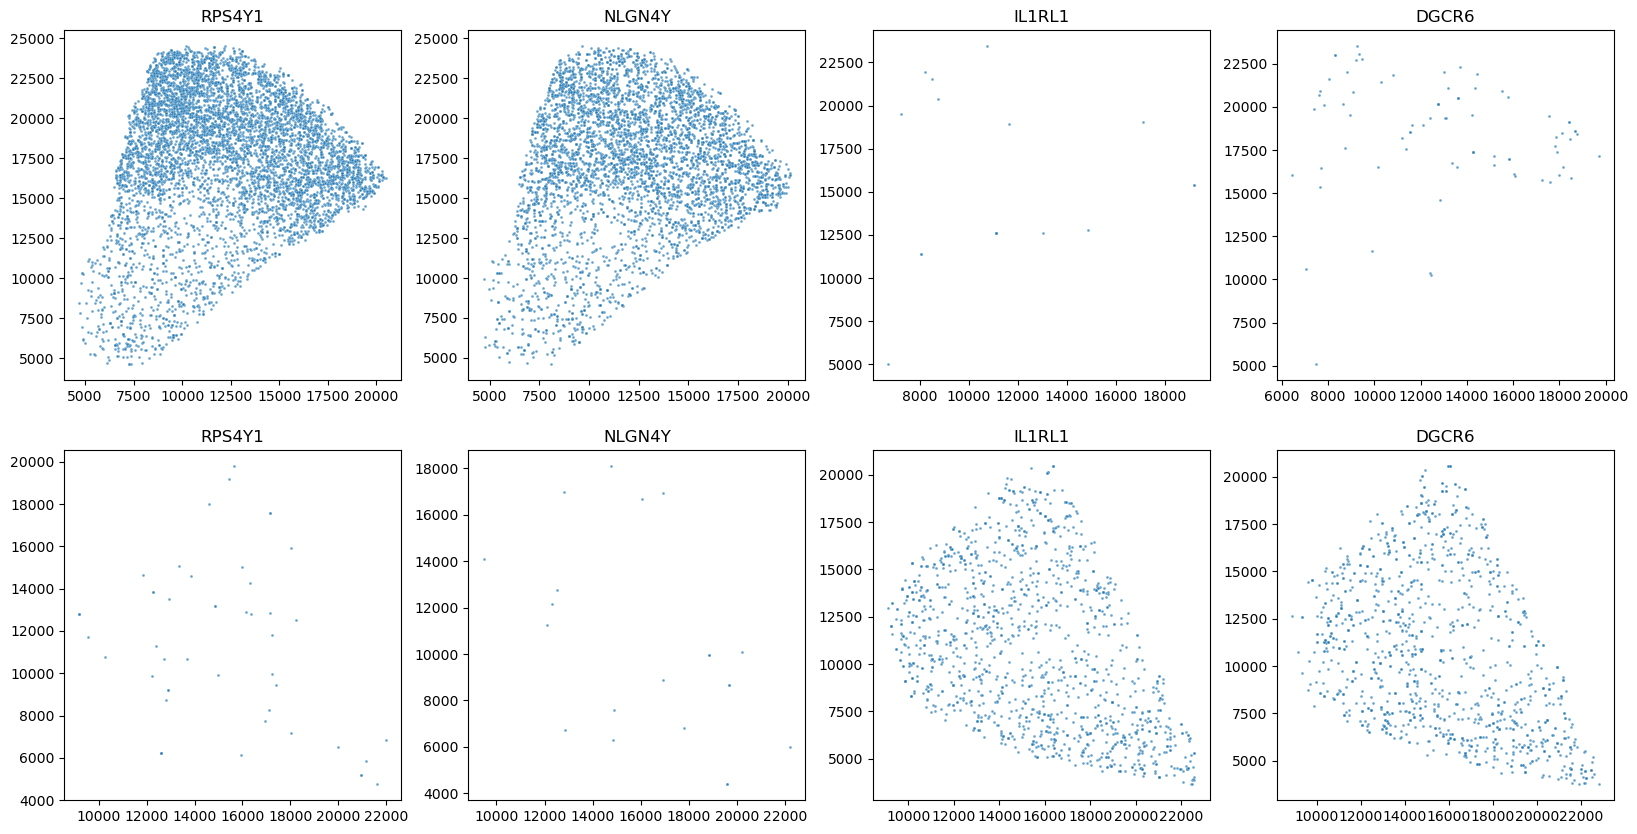

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

plot_genes = ['RPS4Y1','NLGN4Y', 'IL1RL1', 'DGCR6']

for i, table in enumerate([human_NT_table, human_AD_table]):
    for j, gene in enumerate(plot_genes):
        gene_table = table.get_genes([gene])
        sns.scatterplot(x=gene_table.x, y=gene_table.y, alpha=0.7, s=4, ax=ax[i, j], legend=False)
        ax[i, j].set_title(gene)

Sensitivity compared to Bulk-seq and MERSCOPE

In [6]:
bulk_file  ='//allen/programs/celltypes/workgroups/rnaseqanalysis/bicore/projects/Bulk_RNASeq/Jennie_Close/StringTie/SQ_BTR3002-02-3_S16/SQ_BTR3002-02-3_S16.gene_abund.tab'

In [7]:
human_bulk = pd.read_csv(bulk_file, sep='\t')
human_bulk.set_index('Gene Name', inplace=True)
human_bulk['length'] = human_bulk.apply(lambda x: abs(x['Start'] - x['End']), axis=1)
human_bulk.head()

Gene ID Reference Strand  Start    End  Coverage  \
Gene Name                                                               
DDX11L1      ENSG00000223972         1      +  11869  14409  0.000000   
WASH7P       ENSG00000227232         1      -  14404  29570  6.567953   
MIR6859-1    ENSG00000278267         1      -  17369  17436  0.553901   
MIR1302-2HG  ENSG00000243485         1      +  29554  31109  0.057004   
MIR1302-2    ENSG00000284332         1      +  30366  30503  0.000000   

                 FPKM       TPM  length  
Gene Name                                
DDX11L1      0.000000  0.000000    2540  
WASH7P       3.418374  6.406300   15166  
MIR6859-1    0.288285  0.540268      67  
MIR1302-2HG  0.056619  0.106109    1555  
MIR1302-2    0.000000  0.000000     137

In [111]:
gene_counts = gene_counts.merge(human_bulk[['FPKM', 'length']], left_index=True, right_index=True, how='outer')
gene_counts.fillna(0, inplace=True)
gene_counts.head()

Human NT  Human AD      FPKM  length
5S_rRNA       0.0       0.0  0.000000   125.0
5S_rRNA       0.0       0.0  0.002835   114.0
5S_rRNA       0.0       0.0  0.000000   119.0
5S_rRNA       0.0       0.0  0.000000   118.0
5S_rRNA       0.0       0.0  0.000000   118.0

In [ ]:
drop_outs = gene_counts[(gene_counts['Human NT']==0) | (gene_counts['Human AD']==0)]
drop_outs = drop_outs[drop_outs['FPKM']>0]
drop_outs.head()

In [ ]:
len(drop_outs.index.unique())

In [66]:
drop_outs.describe()

Human NT      Human AD           FPKM        length
count  11322.000000  11322.000000   11322.000000  1.132200e+04
mean       0.058382      0.033828      28.734424  1.494954e+04
std        1.398461      0.417788    2273.254398  6.082766e+04
min        0.000000      0.000000       0.000001  2.700000e+01
25%        0.000000      0.000000       0.089692  2.990000e+02
50%        0.000000      0.000000       0.282698  8.880000e+02
75%        0.000000      0.000000       0.913128  3.590250e+03
max      125.000000     17.000000  240697.343750  1.299385e+06

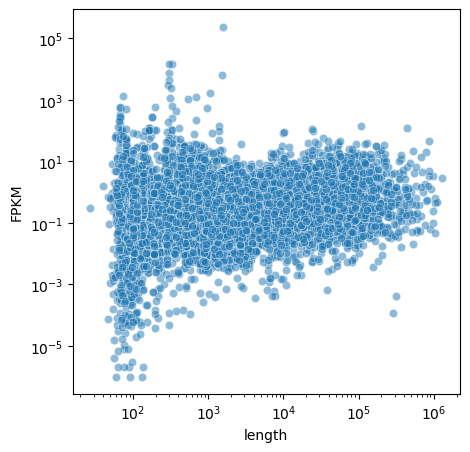

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(data=drop_outs, x='length', y='FPKM', alpha=0.5, lw=0, ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

In [112]:
gene_counts = gene_counts[gene_counts['FPKM']>0]
gene_counts = gene_counts.drop_duplicates()
gene_counts.head()

Human NT  Human AD       FPKM  length
5S_rRNA         0.0       0.0   0.002835   114.0
5_8S_rRNA       0.0       0.0  13.784728   152.0
5_8S_rRNA       0.0       0.0   0.063688   151.0
5_8S_rRNA       0.0       0.0  11.309011   152.0
5_8S_rRNA       0.0       0.0  11.985389   152.0

In [113]:
gene_counts['Human NT log'] = np.log(gene_counts['Human NT'])
gene_counts['Human AD log'] = np.log(gene_counts['Human AD'])
gene_counts['FPKM log'] = np.log(gene_counts['FPKM'])

C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [114]:
gene_counts.describe()

C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Human NT       Human AD           FPKM        length  \
count   30559.000000   30559.000000   30559.000000  3.055900e+04   
mean     1940.471841    1831.436042      17.460183  5.155321e+04   
std      7782.685982    9421.054561    1392.013800  1.196316e+05   
min         0.000000       0.000000       0.000001  2.700000e+01   
25%         0.000000       0.000000       0.207566  1.359000e+03   
50%       127.000000     113.000000       0.999436  1.230700e+04   
75%      1611.000000    1510.500000       4.385252  4.960700e+04   
max    422365.000000  733386.000000  240697.343750  2.473538e+06   

       Human NT log  Human AD log      FPKM log  
count  3.055900e+04  3.055900e+04  30559.000000  
mean           -inf          -inf     -0.124338  
std             NaN           NaN      2.132551  
min            -inf          -inf    -13.815511  
25%             NaN           NaN     -1.572304  
50%    4.844187e+00  4.727388e+00     -0.000564  
75%    7.384610e+00  7.320196e+00      1.478247  
max    1.295363e+01  1.350543e+01     12.391296

In [94]:
# correlation for training genes

training_genes = pd.read_csv('C://Users/stephanies/data/BGI_data/903TR_C4/training_genes.csv', header=None)[0].to_list()
training_genes = [g.upper() for g in training_genes]

[None, None]

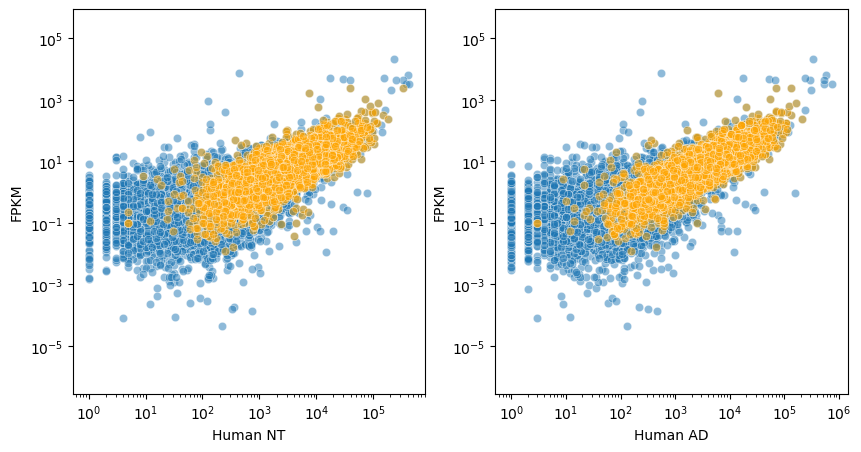

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=gene_counts, x='Human NT', y='FPKM', alpha=0.5, lw=0, ax=ax[0])
sns.scatterplot(data=gene_counts, x='Human AD', y='FPKM', alpha=0.5, lw=0, ax=ax[1])
sns.scatterplot(data=gene_counts[gene_counts.index.isin(training_genes)], x='Human NT', y='FPKM', alpha=0.5, lw=0, ax=ax[0], color='orange')
sns.scatterplot(data=gene_counts[gene_counts.index.isin(training_genes)], x='Human AD', y='FPKM', alpha=0.5, lw=0, ax=ax[1], color='orange')
[a.set_yscale('log') for a in ax]
[a.set_xscale('log') for a in ax]

In [116]:
gene_counts.corr()

Human NT  Human AD      FPKM    length  Human NT log  \
Human NT      1.000000  0.945844  0.049012  0.154404      0.410685   
Human AD      0.945844  1.000000  0.056033  0.101870      0.324454   
FPKM          0.049012  0.056033  1.000000 -0.002778      0.083578   
length        0.154404  0.101870 -0.002778  1.000000      0.259880   
Human NT log  0.410685  0.324454  0.083578  0.259880      1.000000   
Human AD log  0.408753  0.331108  0.088375  0.242396      0.977698   
FPKM log      0.348852  0.288282  0.052398  0.211710      0.781524   

              Human AD log  FPKM log  
Human NT          0.408753  0.348852  
Human AD          0.331108  0.288282  
FPKM              0.088375  0.052398  
length            0.242396  0.211710  
Human NT log      0.977698  0.781524  
Human AD log      1.000000  0.801459  
FPKM log          0.801459  1.000000

MERSCOPE

In [20]:
ad_sp_sea_ad = ad.read_h5ad('C://Users/stephanies/data/human/ad_sp_human_SEA-AD.h5ad')

In [25]:
pd.set_option('display.max_columns', None)
ad_sp_sea_ad.obs[ad_sp_sea_ad.obs['Donor']=='H20.33.012'].head()

cluster subclass_scANVI neighborhood class merscope   avg.cor  \
524738  L2/3 IT_6         L2/3 IT     it_types   exc      M20  0.402403   
524739    Astro_1           Astro         glia  glia      M20  0.491661   
524740     VLMC_2            VLMC         glia  glia      M20  0.639767   
524741     Endo_2            Endo         glia  glia      M20  0.273042   
524742  L2/3 IT_1         L2/3 IT     it_types   exc      M20  0.409602   

        genes_detected  total_reads  prob       volume  \
524738            41.0         89.0  0.72  1452.922247   
524739            32.0         90.0  0.97  1000.280346   
524740            25.0         49.0  0.96  1328.774032   
524741            44.0        108.0  0.68  1575.375962   
524742            38.0         91.0  0.96  1098.916272   

                                   section    filename       Donor  \
524738  H20.33.012.Cx24.MTG.02.007.1.01.01  1194113131  H20.33.012   
524739  H20.33.012.Cx24.MTG.02.007.1.01.01  1194113131  H20.33.012   
524740  H20.33.012.Cx24.MTG.02.007.1.01.01  1194113131  H20.33.012   
524741  H20.33.012.Cx24.MTG.02.007.1.01.01  1194113131  H20.33.012   
524742  H20.33.012.Cx24.MTG.02.007.1.01.01  1194113131  H20.33.012   

                                  Specimen   uwa Specimen Type  \
524738  H20.33.012.Cx24.MTG.02.007.1.01.01  7017        ADNC 1   
524739  H20.33.012.Cx24.MTG.02.007.1.01.01  7017        ADNC 1   
524740  H20.33.012.Cx24.MTG.02.007.1.01.01  7017        ADNC 1   
524741  H20.33.012.Cx24.MTG.02.007.1.01.01  7017        ADNC 1   
524742  H20.33.012.Cx24.MTG.02.007.1.01.01  7017        ADNC 1   

       Unique Donor ID technical replicates Dementia  Age (Y) Sex  \
524738   H20.33.012.01        H20.33.012_01        Y     91.0   F   
524739   H20.33.012.01        H20.33.012_01        Y     91.0   F   
524740   H20.33.012.01        H20.33.012_01        Y     91.0   F   
524741   H20.33.012.01        H20.33.012_01        Y     91.0   F   
524742   H20.33.012.01        H20.33.012_01        Y     91.0   F   

       Final QC status  donor_pseudotime  unique_pseudotime    napari_x  \
524738               p           0.23701                 17 -508.653807   
524739               p           0.23701                 17 -526.125659   
524740               p           0.23701                 17 -638.501435   
524741               p           0.23701                 17 -698.502087   
524742               p           0.23701                 17 -722.166691   

           napari_y  selected_cells  depth_coordinate  normalized_depth  
524738  3701.263713           False              -1.0              -0.1  
524739  3747.324172           False              -1.0              -0.1  
524740  3668.165154           False              -1.0              -0.1  
524741  3751.084314           False              -1.0              -0.1  
524742  3468.088135           False              -1.0              -0.1

In [28]:
pd.read_csv('C://Users/stephanies/data/human/H20.33.002/1190312477/detected_transcripts.csv', sep=',', nrows=10)

Unnamed: 0  barcode_id    global_x    global_y  global_z            x  \
0      229496          14  134.249359  602.562805       0.0  1878.339600   
1      436196          27  138.586929  603.354370       0.0  1918.502197   
2      534483          33   27.119022  513.529358       4.0   886.392029   
3      550380          34  136.983536  602.157288       0.0  1903.656006   
4      718030          47  137.533081  609.080200       0.0  1908.744507   
5      957400          61  134.757767  602.220825       0.0  1883.046997   
6      969714          62   33.427006  542.450317       0.0   944.799316   
7     1107438          70   54.472446  531.378784       5.0  1139.664429   
8     1219165          75   80.904198  509.194885       6.0  1384.402954   
9     1296593          79   86.853531  590.122253       2.0  1439.489258   

             y  fov     gene    transcript_id  
0  1833.305054    0     DLX1  ENST00000341900  
1  1840.634766    0    CBLN2  ENST00000585159  
2  1008.921753    0    MEIS2  ENST00000397624  
3  1829.550293    0    LRP1B  ENST00000437977  
4  1893.651489    0     KAZN  ENST00000400798  
5  1830.138916    0    DCLK1  ENST00000379893  
6  1276.708374    0    FGF13  ENST00000305414  
7  1174.194092    0  GALNTL6  ENST00000511251  
8   968.787476    0      DCC  ENST00000412726  
9  1718.114746    0  ZNF385D  ENST00000281523

In [37]:
human_path = 'C:\\Users\stephanies\data\human'
merscope_nt_table = SpotTable.load_merscope(human_path + '/H20.33.002/1190312477/detected_transcripts.csv', 
                                      human_path + '/H20.33.002/1190312477/detected_transcripts.npz')
merscope_ad_table = SpotTable.load_merscope(human_path + '/H20.33.012/1194113131/detected_transcripts.csv', 
                                      human_path + '/H20.33.012/1194113131/detected_transcripts.npz')

Loading from npz..
Loading from npz..


In [63]:
merscope_nt_region = merscope_nt_table.get_subregion(xlim=(1500, 3100), ylim=(2300, 3900))
merscope_ad_region = merscope_ad_table.get_subregion(xlim=(1000, 2600), ylim=(6000, 7600))

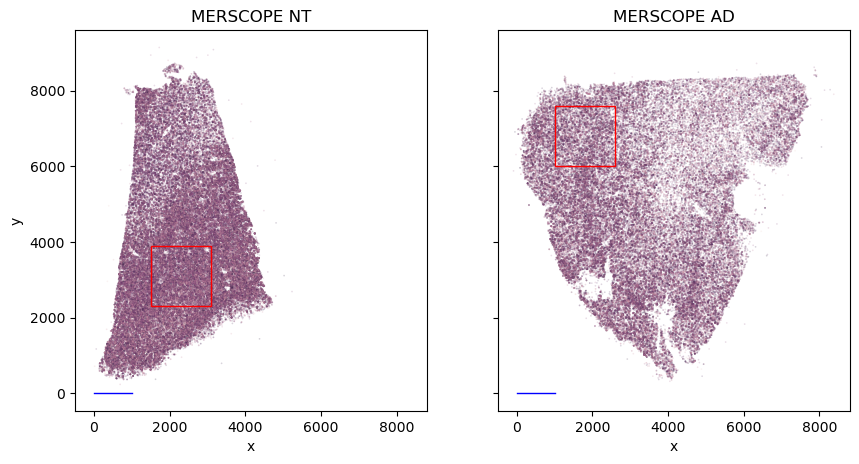

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

merscope_nt_table[::50].scatter_plot(ax[0])
merscope_nt_region.plot_rect(ax[0], 'r')
ax[0].set_title('MERSCOPE NT')
ax[1].set_title('MERSCOPE AD')
merscope_ad_table[::50].scatter_plot(ax[1])
merscope_ad_region.plot_rect(ax[1], 'r')

merscope_mm = (0, 1000)
_ = ax[0].plot(merscope_mm, (0, 0), c='b', lw=1)
_ = ax[1].plot(merscope_mm, (0, 0), c='b', lw=1)

In [65]:
#3201 span
stereoseq_nt_region = human_NT_table.get_subregion(xlim=(11000, 14201), ylim=(19000, 22201))
stereoseq_ad_region = human_AD_table.get_subregion(xlim=(11000, 14201), ylim=(10000, 13201))

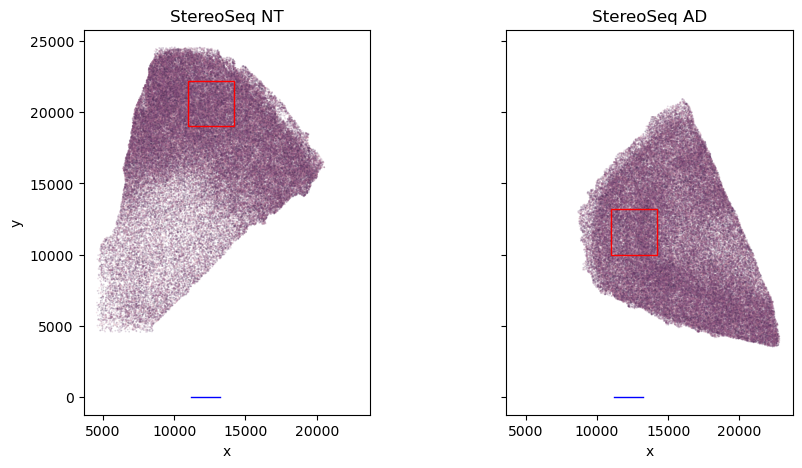

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

human_NT_table[::500].scatter_plot(ax[0])
stereoseq_nt_region.plot_rect(ax[0], 'r')
ax[0].set_title('StereoSeq NT')
ax[1].set_title('StereoSeq AD')
human_AD_table[::500].scatter_plot(ax[1])
stereoseq_ad_region.plot_rect(ax[1], 'r')

stereoseq_mm = (11200, 13201)
_ = ax[0].plot(stereoseq_mm, (0, 0), c='b', lw=1)
_ = ax[1].plot(stereoseq_mm, (0, 0), c='b', lw=1)

Text(0.5, 1.0, 'StereoSeq AD')

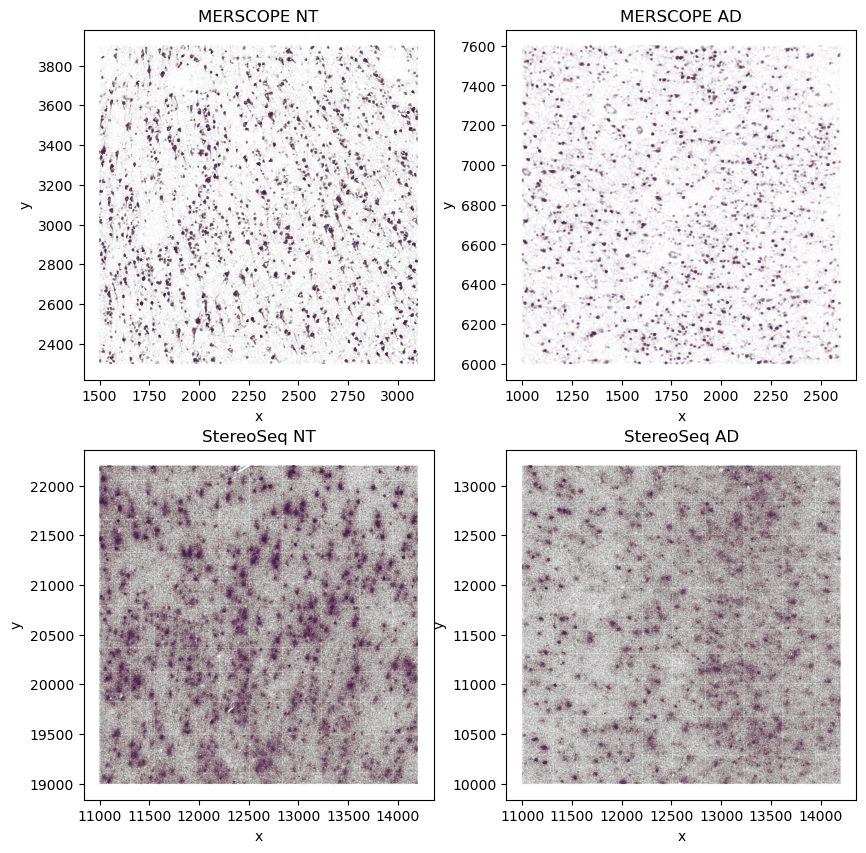

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
merscope_nt_region.scatter_plot(ax=ax[0, 0], alpha=0.005)
ax[0, 0].set_title('MERSCOPE NT')
merscope_ad_region.scatter_plot(ax=ax[0, 1], alpha=0.01)
ax[0, 1].set_title('MERSCOPE AD')
stereoseq_nt_region.scatter_plot(ax=ax[1, 0], alpha=0.005)
ax[1, 0].set_title('StereoSeq NT')
stereoseq_ad_region.scatter_plot(ax=ax[1, 1], alpha=0.005)
ax[1, 1].set_title('StereoSeq AD')

In [69]:
merscope_nt_genes, merscope_nt_counts = np.unique(merscope_nt_table.gene_names, return_counts=True)
merscope_ad_genes, merscope_ad_counts = np.unique(merscope_ad_table.gene_names, return_counts=True)

In [117]:
merscope_counts = pd.DataFrame(data=merscope_nt_counts, index=merscope_nt_genes, columns=['MERSCOPE NT'])
merscope_counts = merscope_counts.merge(pd.DataFrame(data=merscope_ad_counts, index=merscope_ad_genes, columns=['MERSCOPE AD']),
                                        left_index=True, right_index=True)
blanks = [b for b in merscope_ad_genes if b.startswith('Blank')]
merscope_blanks = merscope_counts.loc[blanks]
merscope_counts.drop(blanks, inplace=True)
merscope_counts = merscope_counts.merge(gene_counts, left_index=True, right_index=True, how='inner').rename(
    columns={'Human NT': 'Stereoseq NT', 'Human AD': 'Stereoseq AD'})
for col in merscope_counts.columns:
    merscope_counts[col+ ' log'] = np.log(merscope_counts[col])
print(len(merscope_counts))
merscope_counts.head()

138


C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\pandas\core\arraylike.py:397: 

MERSCOPE NT  MERSCOPE AD  Stereoseq NT  Stereoseq AD      FPKM  \
ADAMTS3         18230         9194        1165.0         763.0  0.665665   
ADAMTSL1         5858         3993        1152.0        1080.0  0.455696   
ANK1            38308        25778        2022.0        1997.0  2.149632   
ASIC2           47526        31429       15319.0       12058.0  2.976465   
ASTN2           80886        45212        7743.0        5578.0  6.010297   

             length  Human NT log  Human AD log  FPKM log  MERSCOPE NT log  \
ADAMTS3    288252.0      7.060476      6.637258 -0.406969         9.810824   
ADAMTSL1  1004387.0      7.049255      6.984716 -0.785929         8.675564   
ANK1       243542.0      7.611842      7.599401  0.765297        10.553414   
ASIC2     1161877.0      9.636849      9.397484  1.090736        10.769032   
ASTN2      989845.0      8.954544      8.626586  1.793474        11.300796   

          MERSCOPE AD log  Stereoseq NT log  Stereoseq AD log  length log  \
ADAMTS3          9.126306          7.060476          6.637258   12.571590   
ADAMTSL1         8.292298          7.049255          6.984716   13.819888   
ANK1            10.157277          7.611842          7.599401   12.403045   
ASIC2           10.355486          9.636849          9.397484   13.965547   
ASTN2           10.719118          8.954544          8.626586   13.805304   

          Human NT log log  Human AD log log  FPKM log log  
ADAMTS3           1.954513          1.892699           NaN  
ADAMTSL1          1.952922          1.943724           NaN  
ANK1              2.029705          2.028069     -0.267492  
ASIC2             2.265594          2.240442      0.086853  
ASTN2             2.192161          2.154849      0.584155

In [71]:
merscope_blanks['Avg'] = merscope_blanks.apply(lambda x: x.mean(), axis=1)
merscope_blanks.head()

MERSCOPE NT  MERSCOPE AD     Avg
Blank-0          3651         1979  2815.0
Blank-1          4960         2249  3604.5
Blank-10         1637         1042  1339.5
Blank-11         2186         1112  1649.0
Blank-12         6641         1823  4232.0

<AxesSubplot:>

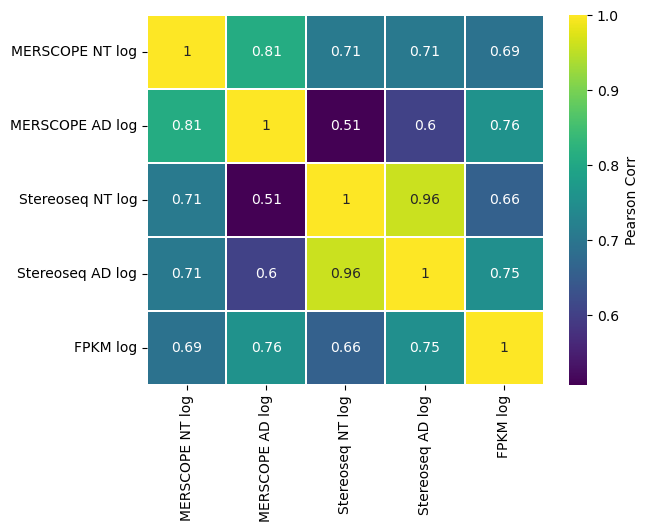

In [118]:
 sns.heatmap(merscope_counts[['MERSCOPE NT log', 'MERSCOPE AD log', 'Stereoseq NT log', 'Stereoseq AD log', 'FPKM log']].corr(), 
                             cmap ='viridis', linewidths = 0.30, annot = True, cbar_kws={'label': 'Pearson Corr'})

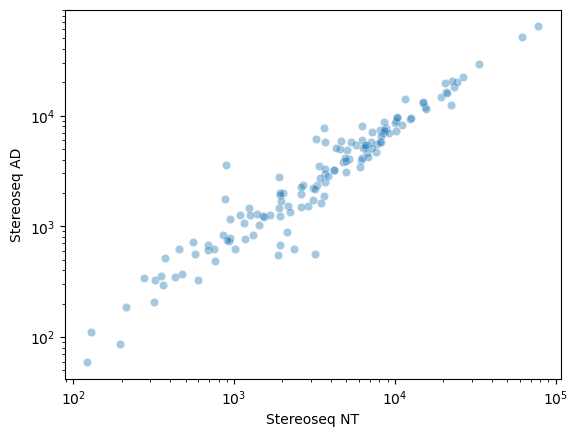

In [76]:
ax = sns.scatterplot(data=merscope_counts, x='Stereoseq NT', y='Stereoseq AD', alpha=0.4, lw=0)
ax.set_yscale('log')
ax.set_xscale('log')

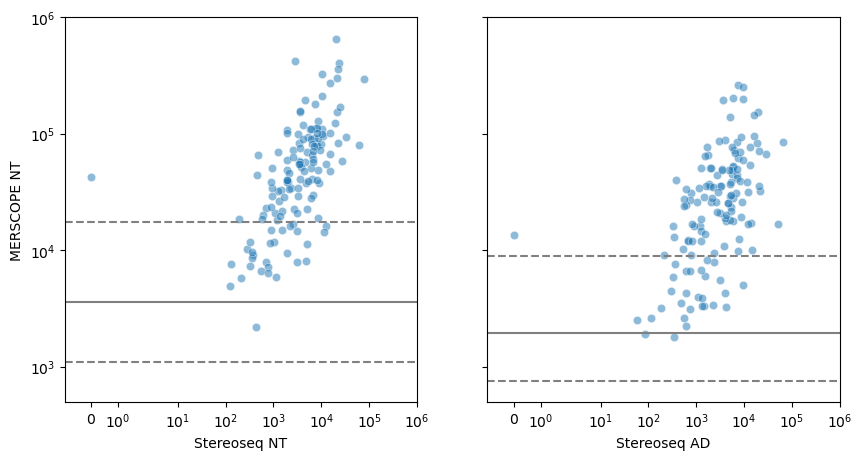

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

sns.scatterplot(data=merscope_counts, x='Stereoseq NT', y='MERSCOPE NT', alpha=0.5, lw=0, ax=ax[0])
sns.scatterplot(data=merscope_counts, x='Stereoseq AD', y='MERSCOPE AD', alpha=0.5, lw=0, ax=ax[1])

min_blank_nt = merscope_blanks['MERSCOPE NT'].min()
max_blank_nt = merscope_blanks['MERSCOPE NT'].max()
avg_blank_nt = merscope_blanks['MERSCOPE NT'].mean()
ax[0].axhline(min_blank_nt, color='grey', ls='--')
ax[0].axhline(max_blank_nt, color='grey', ls='--')
ax[0].axhline(avg_blank_nt, color='grey')

min_blank_ad = merscope_blanks['MERSCOPE AD'].min()
max_blank_ad = merscope_blanks['MERSCOPE AD'].max()
avg_blank_ad = merscope_blanks['MERSCOPE AD'].mean()
ax[1].axhline(min_blank_ad, color='grey', ls='--')
ax[1].axhline(max_blank_ad, color='grey', ls='--')
ax[1].axhline(avg_blank_ad, color='grey')

_ = [axs.set_xscale('symlog', base=10) for axs in ax]
_ = [axs.set_yscale('symlog', base=10) for axs in ax]

_ = [axs.set_xlim(-1, 1e6) for axs in ax]
_ = [axs.set_ylim(5e2, 1e6) for axs in ax]

In [120]:
dropouts = merscope_counts[(merscope_counts['Stereoseq NT'] == 0) | (merscope_counts['Stereoseq AD'] == 0)]
dropouts

MERSCOPE NT  MERSCOPE AD  Stereoseq NT  Stereoseq AD      FPKM  \
TAFA1        42953        13600           0.0           0.0  4.149606   

         length  Human NT log  Human AD log  FPKM log  MERSCOPE NT log  \
TAFA1  541374.0          -inf          -inf  1.423013        10.667862   

       MERSCOPE AD log  Stereoseq NT log  Stereoseq AD log  length log  \
TAFA1         9.517825              -inf              -inf   13.201866   

       Human NT log log  Human AD log log  FPKM log log  
TAFA1               NaN               NaN      0.352777

In [84]:
def abline(slope, intercept, ax, args=None):
    """Plot a line from slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, **args)

In [85]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import QuantileTransformer
model = LinearRegression()
qt = QuantileTransformer(n_quantiles=50, output_distribution='normal')

In [86]:
stereoseq_nt_counts = merscope_counts[['Stereoseq NT', 'MERSCOPE NT']]
stereoseq_nt_counts['Ratio'] = stereoseq_nt_counts.apply(lambda x: x['Stereoseq NT'] / x['MERSCOPE NT'], axis=1)
x = stereoseq_nt_counts['Stereoseq NT'].to_numpy().reshape((-1, 1))
y = stereoseq_nt_counts['MERSCOPE NT'].to_numpy()
s1_fit = model.fit(np.log(x), np.log(y))
print(f'R^2: {s1_fit.score(np.log(x), np.log(y)): 0.3f}')


R^2:  0.500


C:\Users\stephanies\AppData\Local\Temp\ipykernel_26120\4263480568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stereoseq_nt_counts['Ratio'] = stereoseq_nt_counts.apply(lambda x: x['Stereoseq NT'] / x['MERSCOPE NT'], axis=1)


In [87]:
stereoseq_ad_counts = merscope_counts[['Stereoseq AD', 'MERSCOPE AD']]
stereoseq_ad_counts['Ratio'] = stereoseq_ad_counts.apply(lambda x: x['Stereoseq AD'] / x['MERSCOPE AD'], axis=1)
x = stereoseq_ad_counts['Stereoseq AD'].to_numpy().reshape((-1, 1))
y = stereoseq_ad_counts['MERSCOPE AD'].to_numpy()
s2_fit = model.fit(np.log(x), np.log(y))
print(f'R^2: {s2_fit.score(np.log(x), np.log(y)): 0.3f}')


R^2:  0.365


C:\Users\stephanies\AppData\Local\Temp\ipykernel_26120\1736679963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stereoseq_ad_counts['Ratio'] = stereoseq_ad_counts.apply(lambda x: x['Stereoseq AD'] / x['MERSCOPE AD'], axis=1)


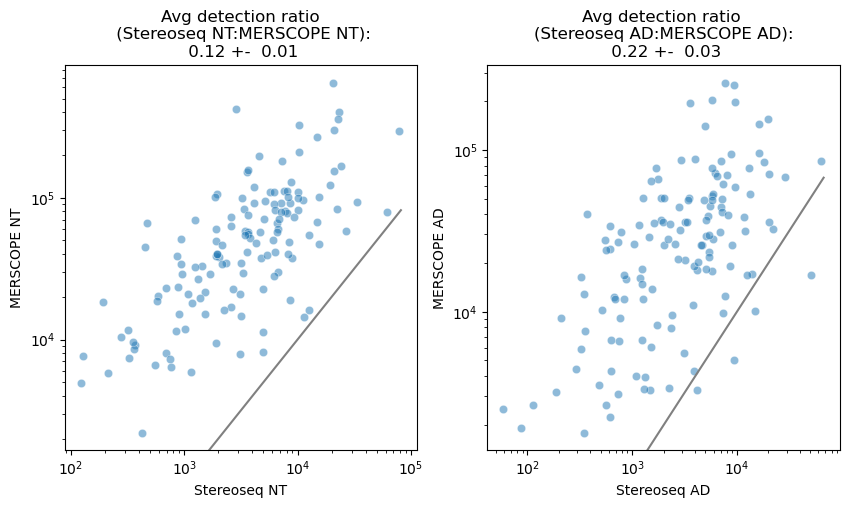

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=stereoseq_nt_counts, x='Stereoseq NT', y='MERSCOPE NT', alpha=0.5, lw=0, ax=ax[0])
sns.scatterplot(data=stereoseq_ad_counts, x='Stereoseq AD', y='MERSCOPE AD', alpha=0.5, lw=0, ax=ax[1])

abline(1, 0, ax[0], args={'color': 'grey'})
ax[0].set_title(f'Avg detection ratio\n (Stereoseq NT:MERSCOPE NT):\n{stereoseq_nt_counts["Ratio"].mean(): 0.2f} +- {stereoseq_nt_counts["Ratio"].sem(): 0.2f}')
abline(1, 0, ax[1], args={'color': 'grey'})
ax[1].set_title(f'Avg detection ratio \n(Stereoseq AD:MERSCOPE AD):\n{stereoseq_ad_counts["Ratio"].mean(): 0.2f} +- {stereoseq_ad_counts["Ratio"].sem(): 0.2f}')

_ = [axs.set_xscale('log') for axs in ax]
_ = [axs.set_yscale('log') for axs in ax]